In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем необходимые библиотеки и присваиваем им сокращенные названия.

In [2]:
# Importing the dataset
df = pd.read_csv('kr2_var2.csv', sep=',')

Импортируем файл с данными используя библиотеку пандас.

In [3]:
df

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,32,m,52.5,7.7,6.93,3.23,106.0,12.1,69.0,0
1,32,m,70.3,18.0,11.17,4.80,74.0,15.6,76.5,0
2,32,m,74.7,36.2,8.84,5.20,86.0,33.2,79.3,0
3,32,m,52.0,30.6,7.33,4.74,80.0,33.8,75.7,0
4,32,m,74.1,32.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,416.6,5.9,5.57,6.30,55.7,650.9,68.5,1
611,64,f,102.8,2.9,1.54,3.02,63.0,35.9,71.3,1
612,64,f,87.3,3.5,1.66,3.63,66.7,64.2,82.0,1
613,46,f,NaN,39.0,3.56,4.20,52.0,50.0,71.0,1


Выводим датасет на экран. Количество наблюдений 615, количество факторов из них 8 количественных и 1 качественный.

In [4]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ALP,18,0.029268
CHOL,10,0.016260
PROT,1,0.001626
ALT,1,0.001626
Category,0,0.000000
GGT,0,0.000000
CREA,0,0.000000
CHE,0,0.000000
Sex,0,0.000000
Age,0,0.000000


Проверяем наличие пропусков, присутствуют они только в числовых значениях.

In [5]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Избавляемся от пропусков, используя стратегию заполнения их средними значениями.

In [6]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [7]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
PROT,0,0.0
GGT,0,0.0
CREA,0,0.0
CHOL,0,0.0
CHE,0,0.0
ALT,0,0.0
ALP,0,0.0
Sex,0,0.0
Age,0,0.0


Делаем конечную проверку на наличие пропусков и убеждаемся, что их нет.

In [8]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

Кодируем качественные переменные.

In [9]:
# Encoding categorical data
df = encoding_char(df)

Полученные результаты запишем в исходный датасет.

In [10]:
df

,Age,Sex,ALP,ALT,CHE,CHOL,CREA,GGT,PROT,Category
0,32.0,0,52.50000,7.7,6.93,3.23,106.0,12.1,69.0,0.0
1,32.0,0,70.30000,18.0,11.17,4.80,74.0,15.6,76.5,0.0
2,32.0,0,74.70000,36.2,8.84,5.20,86.0,33.2,79.3,0.0
3,32.0,0,52.00000,30.6,7.33,4.74,80.0,33.8,75.7,0.0
4,32.0,0,74.10000,32.6,9.15,4.32,76.0,29.9,68.7,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,416.60000,5.9,5.57,6.30,55.7,650.9,68.5,1.0
611,64.0,1,102.80000,2.9,1.54,3.02,63.0,35.9,71.3,1.0
612,64.0,1,87.30000,3.5,1.66,3.63,66.7,64.2,82.0,1.0
613,46.0,1,68.28392,39.0,3.56,4.20,52.0,50.0,71.0,1.0


Посмотрим как выглядит таблица после кодирования, можем видеть, что теперь все переменные являются числовыми и с ними можно работать.

In [11]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Разделим наш датасет на обучающую и тестовую выборки в пропорции 20% / 80%.

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Проведем шкалирование данных с помощью библиотеки sklearn.preprocessing, также стоит обратить внимание, что наша эндогенная переменная в шкалировании не нуждается, она уже должна быть дискретного типа (0;1).

In [13]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.514381
         Iterations 7
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.293  
Dependent Variable: y                AIC:              524.1512
Date:               2020-12-29 10:46 BIC:              561.9375
No. Observations:   492              Log-Likelihood:   -253.08 
Df Model:           8                LL-Null:          -195.80 
Df Residuals:       483              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1       0.1267     0.1154    1.0979   0.2722   -0.0995    0.3528
x2       0.1144     0.1188    0.9625   0.3358   -0.1185    0.3472
x3      -0.3371  

Построим базовую модель и посмотрим отчет по этой модели. Можем видеть, что 3 переменные значимые, p-value по остальным переменным превышает 3,82% и я не буду использовать их для построения классификаторов.

In [14]:
# p-value < 3,82 % Features
X_train = X_train[:,[2, 5, 7]]
X_test = X_test[:,[2, 5, 7, ]]

Преобразуем тестовую и обучающие выборки, оставив в них только значимые переменные.

In [15]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

Обучим модель логистической регрессии.

In [16]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.9349593495934959

Оцениваем качество модели, видим что уровень качества очень высокий, то есть больше 93% объектов распознаны верно.

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  6   9]]


Строим таблицу сопряженности, видим, что 6 положительных случаев ложно определены как отрицательные, в тоже время 2 негативных исхода, определены моделью, как позитивные. 115 объектов модель распознала верно.

In [18]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Запишем и поместим в файл data.pkl наши тестовую и обучающую выборки, для дальнейщего использования при построении остальных моделей.

In [19]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Импортируем наши данные.

In [20]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Импортируем необходимые библиотеки и что важно обновляем их через командую строку.

In [21]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 3,  activation = 'relu', input_dim = 3))

# Adding the output layer
cnn.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Построим нейронную сеть прямой передачи сигнала. Так как параметров для классификации было выбрано 5, соответственно на входном слое находится 5 нейронов. На втором слое выберем 1 нейрон.

In [22]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5787 - accuracy: 0.7846 - val_loss: 0.5058 - val_accuracy: 0.8699
Epoch 2/100
62/62 [==============================] - 0s 999us/step - loss: 0.5295 - accuracy: 0.8496 - val_loss: 0.4612 - val_accuracy: 0.8537
Epoch 3/100
62/62 [==============================] - 0s 971us/step - loss: 0.4867 - accuracy: 0.8760 - val_loss: 0.4201 - val_accuracy: 0.8862
Epoch 4/100
62/62 [==============================] - 0s 869us/step - loss: 0.4469 - accuracy: 0.8862 - val_loss: 0.3884 - val_accuracy: 0.8943
Epoch 5/100
62/62 [==============================] - 0s 788us/step - loss: 0.4125 - accuracy: 0.8821 - val_loss: 0.3591 - val_accuracy: 0.8943
Epoch 6/100
62/62 [==============================] - 0s 901us/step - loss: 0.3835 - accuracy: 0.8862 - val_loss: 0.3365 - val_accuracy: 0.9024
Epoch 7/100
62/62 [==============================] - 0s 869us/step - loss: 0.3590 - accuracy: 0.8882 - val_loss: 0.3178 - val_accuracy: 0.9024
E

Epoch 58/100
62/62 [==============================] - 0s 760us/step - loss: 0.1915 - accuracy: 0.9248 - val_loss: 0.2101 - val_accuracy: 0.9512
Epoch 59/100
62/62 [==============================] - 0s 724us/step - loss: 0.1911 - accuracy: 0.9268 - val_loss: 0.2099 - val_accuracy: 0.9512
Epoch 60/100
62/62 [==============================] - 0s 748us/step - loss: 0.1908 - accuracy: 0.9268 - val_loss: 0.2096 - val_accuracy: 0.9512
Epoch 61/100
62/62 [==============================] - 0s 740us/step - loss: 0.1904 - accuracy: 0.9268 - val_loss: 0.2094 - val_accuracy: 0.9512
Epoch 62/100
62/62 [==============================] - 0s 813us/step - loss: 0.1900 - accuracy: 0.9248 - val_loss: 0.2088 - val_accuracy: 0.9512
Epoch 63/100
62/62 [==============================] - 0s 788us/step - loss: 0.1894 - accuracy: 0.9268 - val_loss: 0.2087 - val_accuracy: 0.9512
Epoch 64/100
62/62 [==============================] - 0s 777us/step - loss: 0.1889 - accuracy: 0.9268 - val_loss: 0.2083 - val_accuracy:

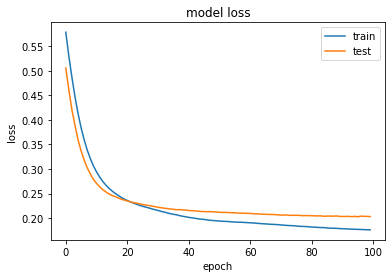

In [23]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [24]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

Сделаем прогнозирование, порог оставим прежний.

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  4  11]]


Построив таблицу сопряженности, видим, что она стала лучше (было 6 неверно распознанных объектов, стало 4). При этом я увеличила количество нейронов на 1ом слое до 3, усложнять архитектуру на такой маленькой выборке смысла нет. 117 объектов распознаны верно,  модель обучилась и стала лучше.